# BCB 546 Python Homework
Author: Ryan Godin

Run the following cell to load the libraries needed for the rest of the code in this notebook.

In [90]:
## IMPORTANT: install BioPython so that this will work

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

## Task 1: Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

### Instructions


```python
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
```

### Solution:

See the code cell below for the properly documented function.

In [91]:
def get_sequences_from_file(fasta_fn):
    """
    This function parses a fasta file and for all entries it: (1) extracts the species name from 
    the header and(2) stores the species name along with its sequence in a dictionary. It then 
    returns this dictonary. 

    Args:
        fasta_fn (string): File name for the fasta file that should be parsed.

    Returns:
        sequence_data_dict (dict): dictionary with species names as keys and the sequence as the 
        entry. 

    Note: 
        If there is more than one entry for a species the sequence will be overwritten.
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return sequence_data_dict

### Example Usage:
Run the cell below to see the function in action.

In [92]:
get_sequences_from_file("penguins_cytb.fasta")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

## Task 2: Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion. 

### Instructions: 

```python
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)
```

### Solution:

See the code cell below for the requested function.

In [93]:
def translate_function(coding_sequence):
    # Initialize empty amino acid string
    aa_seq_string = ""  
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    stop_codons = mito_table.stop_codons
    if len(coding_sequence) % 3 != 0:
        raise ValueError("The sequence is not a multiple of 3, so it is not correct.")
    for nucleotide in range(0, len(coding_sequence), 3):
        end_nucleotide = nucleotide + 3
        codon = coding_sequence[nucleotide:end_nucleotide]
        if codon not in stop_codons:
            amino_acid = mito_table.forward_table[codon]
            aa_seq_string += amino_acid

    return aa_seq_string

### Example Usage:

Run the cell below to see an example usage of the translation function with a stop codon at the end.

In [94]:
translate_function(coding_sequence="ATGAGCCGCGATCATATGGTGCTGCATGAATATGTGAACGCGGCGGGCATTACCTAA")

'MSRDHMVLHEYVNAAGIT'

## Task 3: Write an alternative translation function.

### Instructions:

```python
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.
```

### Solution:

The solution is given in the cell block below:

The following resources were used: https://biopython.org/wiki/Seq

In [95]:
from Bio.Seq import Seq

def alt_translate_function(coding_sequence):
    coding_sequence = Seq(coding_sequence)
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    translated_seq = coding_sequence.translate(table= mito_table, to_stop=True)
    return str(translated_seq)

### Example Usage:

Run the cell below to see an example usage of the translation function with a stop codon at the end.

In [96]:
alt_translate_function("ATGAGCCGCGATCATATGGTGCTGCATGAATATGTGAACGCGGCGGGCATTACCTAA")

'MSRDHMVLHEYVNAAGIT'

## Task 4: Write a function that calculates the molecular weight of each 3 amino acid sequence.

### Instructions:

```python
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight
```

### Solution:

The solution is given in the cell block below.

I used the following resources: https://biopython.org/docs/latest/api/Bio.SeqUtils.ProtParam.html#Bio.SeqUtils.ProtParam.ProteinAnalysis 

In [97]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def get_molecular_weight(aa_seq):
    molecular_weight = ProteinAnalysis(aa_seq).molecular_weight()
    return molecular_weight

### Example Solution:

The following code block shows an example of the function.

In [98]:
aa_seq = "MSRDHMVLHEYVNAAGIT"
get_molecular_weight(aa_seq)

2044.3143

## Task 5: Write a function that computes the GC-content of each DNA sequence.

### Instructions:

```python
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
# Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA 
# sequence and returns this value.
```

### Solution:

The solution is given in the cell block below.

I used the following resources: https://biopython.org/docs/1.75/api/Bio.SeqUtils.html 

In [99]:
from Bio.SeqUtils import GC

def get_gc_content(dna_seq):
    """
    Fix me
    """
    dna_seq = Seq(dna_seq)
    return GC(dna_seq)


### Example Solution:

The following code block shows an example of the function.

In [100]:
dna_seq = "ATGAGCCGCGATCATATGGTGCTGCATGAATATGTGAACGCGGCGGGCATTACCTAA"
get_gc_content(dna_seq)

50.87719298245614

## Task 6: Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.

### Instructions:

```python
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.
```

### Solution:

The solution is given in the cell block below.

I used the following resources: 

In [101]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

penguins_df["mol_weight"] = "NaN"
penguins_df["gc_%"] = "NaN"
print(penguins_df)

                    species   mass mol_weight gc_%
0      Aptenodytes forsteri  28.00        NaN  NaN
1   Aptenodytes patagonicus  13.40        NaN  NaN
2       Eudyptes chrysocome   2.80        NaN  NaN
3     Eudyptes chrysolophus   4.50        NaN  NaN
4         Eudyptes sclateri   4.25        NaN  NaN
5           Eudyptula minor   1.60        NaN  NaN
6        Pygoscelis adeliae   4.60        NaN  NaN
7     Pygoscelis antarctica   4.10        NaN  NaN
8          Pygoscelis papua   6.10        NaN  NaN
9       Spheniscus demersus   3.20        NaN  NaN
10     Spheniscus humboldti   4.75        NaN  NaN
11  Spheniscus magellanicus   3.40        NaN  NaN


## Task 7: Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

### Instructions:

```python

## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above
```

### Solution:

The solution is given in the cell block below.

I used the following resources: 

In [102]:
def add_missing_data(data_frame, cytb_seqs):
    for species in cytb_seqs.keys():
        dna_seq = str(cytb_seqs[species])
        aa_seq = alt_translate_function(dna_seq)
        mol_weight = get_molecular_weight(aa_seq)
        gc_content = get_gc_content(dna_seq)
        data_frame.loc[data_frame['species'] == species, [
            'mol_weight', 'gc_%']] = mol_weight, gc_content
        data_frame['mol_weight'] = data_frame['mol_weight'].astype(float) 
        data_frame['gc_%'] = data_frame['gc_%'].astype(float)


add_missing_data(penguins_df, cytb_seqs)
print(penguins_df)

                    species   mass  mol_weight       gc_%
0      Aptenodytes forsteri  28.00  42459.6021  48.381452
1   Aptenodytes patagonicus  13.40  42563.7067  49.693788
2       Eudyptes chrysocome   2.80  42475.5753  51.181102
3     Eudyptes chrysolophus   4.50  42445.5493  50.918635
4         Eudyptes sclateri   4.25  42475.5753  50.831146
5           Eudyptula minor   1.60  42491.6408  49.256343
6        Pygoscelis adeliae   4.60  42458.6140  49.081365
7     Pygoscelis antarctica   4.10  42404.5423  47.769029
8          Pygoscelis papua   6.10  42595.8759  47.156605
9       Spheniscus demersus   3.20  42431.5490  48.293963
10     Spheniscus humboldti   4.75  42399.5520  49.256343
11  Spheniscus magellanicus   3.40  42459.6021  48.206474


## Task 8: Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions:

### Instructions:

```python
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?
```

### Solution:

The solution is given in the cell block below.

I used the following resources: https://seaborn.pydata.org/generated/seaborn.barplot.html

Looking at the data, it appears that Eudyptula minor is the smallest penguin species by mass. According to 10.1371/journal.pone.0144966, it appears to be located off the coasts of Australia, New Zealand, and surrounding islands. 

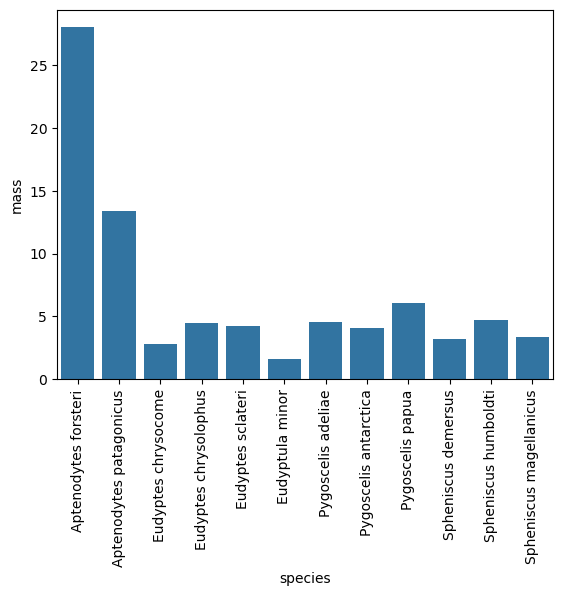

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_mass(data_frame):
    ax = sns.barplot(data_frame, x="species", y="mass", legend=True)
    ax.tick_params(axis='x', rotation=90)

plot_mass(penguins_df)

## Task 9: Plot a graph that shows the molecular weight as a function of GC content.

### Instructions:

```python
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).
```

### Solution:

The solution is given in the cell block below.

I used the following resources: https://seaborn.pydata.org/tutorial/function_overview.html, 


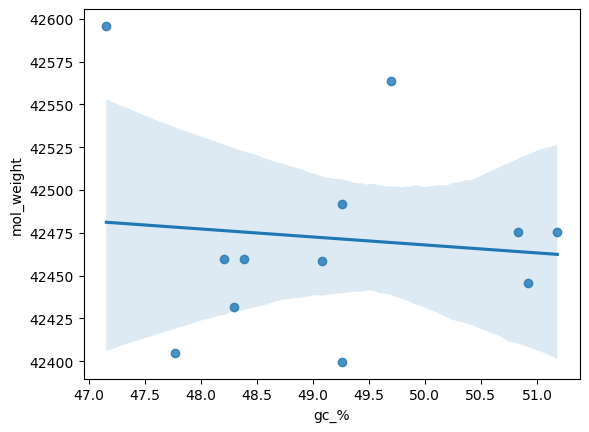

In [104]:
def plot_mol_weight_vs_gc(data_frame):
    sns.regplot(data_frame, x="gc_%", y="mol_weight")

plot_mol_weight_vs_gc(penguins_df)

## Task 10: Write the entire DataFrame to a new CSV file that includes your new columns.

### Instructions:

```python
## Save the new DataFrame to a file called "penguins_mass_cytb.csv"
```

### Solution:

The solution is given in the cell block below.

I used the following resources:

In [105]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False)

## Task 11: BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

### Instructions:

```python
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)
```

### Solution:

The solution is given in the cell block below.

I used the following resources: https://stackoverflow.com/questions/70546742/grouped-bar-chart-in-seaborn

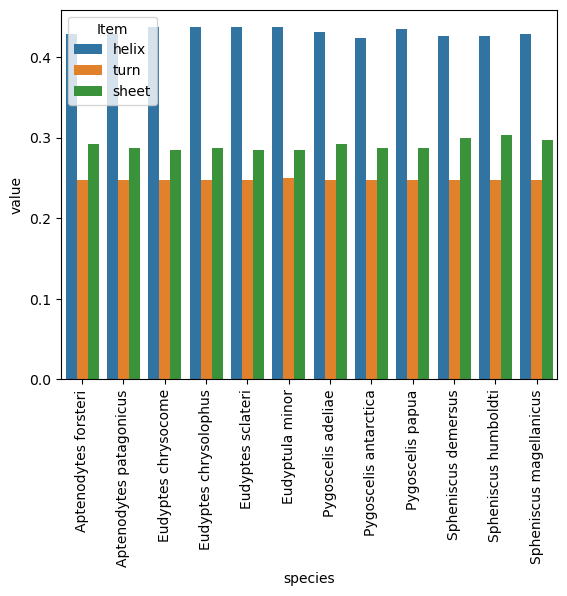

In [113]:
def add_seq_struct_data(data_frame, cytb_seqs):
    for species in cytb_seqs.keys():
        dna_seq = str(cytb_seqs[species])
        aa_seq = alt_translate_function(dna_seq)
        seq_struct = ProteinAnalysis(aa_seq).secondary_structure_fraction()
        data_frame.loc[data_frame['species'] == species, [
            'helix', 'turn', 'sheet']] = seq_struct


add_seq_struct_data(penguins_df, cytb_seqs)
seq_struct_data = penguins_df[['species', 'helix', 'turn', 'sheet']]
seq_struct_data.set_index('species', inplace=True)
seq_struct_data = seq_struct_data.stack().to_frame('value').reset_index()
seq_struct_data.rename(columns={'level_1':'Item'},inplace=True)
ax = sns.barplot(data=seq_struct_data, x='species', y='value', hue='Item')
ax.tick_params(axis='x', rotation=90)
sns.move_legend(ax, "upper left")